# Küresel Altın Fiyatlarının Zaman Serisi Analizi, Ülke Bazlı Kıyaslaması ve Tahmini (1990–2021)

# Küresel Altın Fiyatlarının Zaman Serisi Analizi (1990–2021)

Bu projede farklı ülkelerin altın fiyat verileri kullanılarak:

- Volatilite analizi  
- Ülkeler arası korelasyon analizi  
- Kümeleme (Clustering) ile ülke segmentasyonu  
- Türkiye ve İsviçre için zaman serisi tahmin modelleri gerçekleştirilmiştir.

Amaç, ülkelerin finansal risk profillerini, benzerlik yapılarını ve gelecek fiyat davranışlarını ortaya koymaktır.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [40]:
# excel verisini yükleyelim
df = pd.read_excel("Altın.xlsx", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df.head()

,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
Date,,,,,,,,,,,,,,,,,,
1990-01-31,415.1,321.3,59972.3,247.1,492.0,623.8,7041.0,1930.2,1.0,1557.4,745400.5,1524.9,10623.3,1867170.0,1059.9,283240.8,540.0,1063.2
1990-02-28,407.7,316.2,60672.5,241.2,485.7,607.9,6957.4,1936.8,1.0,1527.7,747408.3,1496.0,10494.1,1853648.1,1085.6,282356.4,534.1,1040.4
1990-03-30,368.5,283.9,57987.1,223.7,431.0,550.8,6334.4,1717.1,0.9,1376.8,652783.7,1348.1,9506.1,1622520.2,947.3,257424.6,488.4,976.9
1990-04-30,367.8,280.7,58375.7,224.3,428.3,533.9,6379.3,1739.6,0.9,1370.0,669724.5,1341.5,9510.6,1651644.8,982.5,258294.2,488.9,975.8
1990-05-31,363.1,280.2,55420.9,216.5,426.2,520.1,6295.5,1717.4,0.9,1371.7,671905.9,1343.2,9352.3,1646877.6,988.3,261068.1,472.2,967.3


## Ülke Bazlı Volatilite Analizi

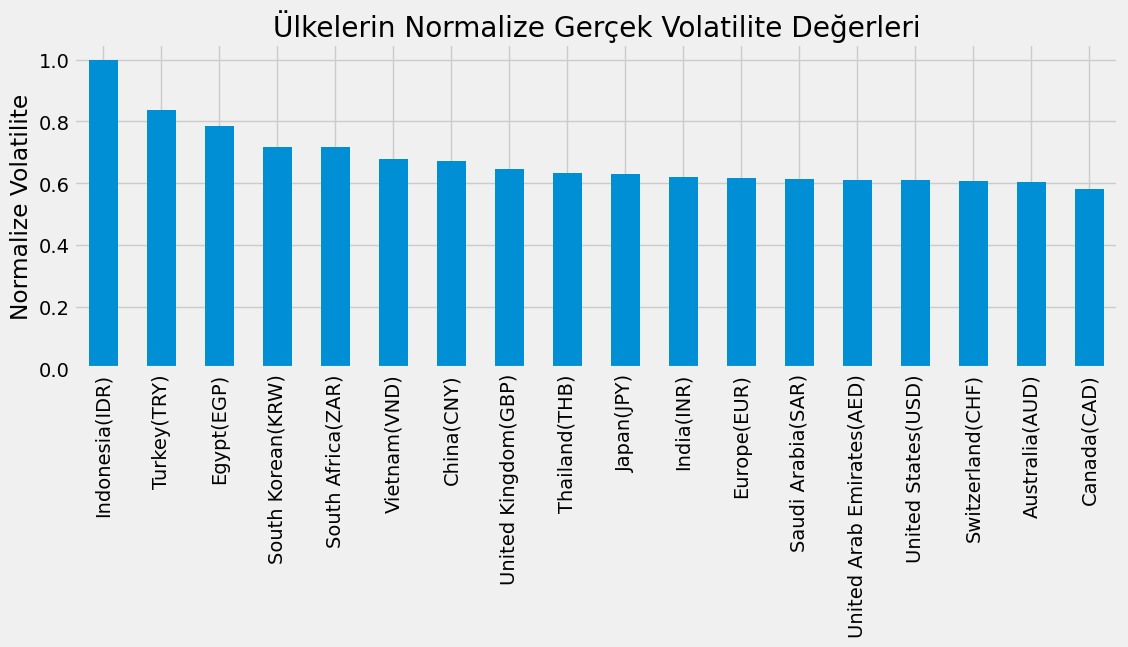

Indonesia(IDR)               1.000000
Turkey(TRY)                  0.836374
Egypt(EGP)                   0.786274
South Korean(KRW)            0.716700
South Africa(ZAR)            0.716588
Vietnam(VND)                 0.678302
China(CNY)                   0.672216
United Kingdom(GBP)          0.645858
Thailand(THB)                0.634001
Japan(JPY)                   0.629521
India(INR)                   0.618760
Europe(EUR)                  0.616070
Saudi Arabia(SAR)            0.612360
United Arab Emirates(AED)    0.611008
United States(USD)           0.610921
Switzerland(CHF)             0.607760
Australia(AUD)               0.603174
Canada(CAD)                  0.582162
dtype: float64

In [42]:
log_returns = np.log(df / df.shift(1)).dropna()

vol = log_returns.std().sort_values(ascending=False)
vol_norm = vol / vol.max()

plt.figure(figsize=(12,4))
vol_norm.plot(kind="bar")
plt.title("Ülkelerin Normalize Gerçek Volatilite Değerleri")
plt.ylabel("Normalize Volatilite")
plt.show()

vol_norm.sort_values(ascending=False)

#### En Yüksek Volatilite
- **Endonezya (IDR)**: En yüksek volatiliteye sahip ülke.  
- **Türkiye (TRY), Mısır (EGP), Güney Afrika (ZAR), Vietnam (VND)**: Volatilitesi yüksek diğer ülkeler.

#### Orta Seviye
- **Güney Kore (KRW), Çin (CNY), İngiltere (GBP)**: Orta düzeyde oynaklık gösteriyor.

#### En Düşük Volatilite
- **Kanada (CAD), İsviçre (CHF), ABD (USD), Avrupa (EUR)**: En düşük volatiliteye sahip ülkeler.  
- Bu ülkeler genellikle daha istikrarlı ekonomik yapıya sahip.

#### Yorum
- **Yüksek volatilite** → daha dalgalı fiyat hareketleri, yerel ekonomik etkiler daha belirgin.  
- **Düşük volatilite** → küresel trendlerle daha uyumlu, yatırımcılar için daha öngörülebilir.

📌 Bu veri, kümeleme ve korelasyon analizlerinde ülkeleri gruplandırmak için kritik bir temel sağlar.

#  Korelasyon Analizi

1990–2021 döneminde farklı ülkelerin altın fiyatları arasındaki ilişkiler incelenmiştir. Amaç, küresel kriz ve pandemi gibi dönemlerde fiyat hareketlerinin benzerliğini ve volatiliteye göre farklılıkları ortaya koymaktır.

##  Neden Korelasyon?
Altın fiyat korelasyonu; piyasa entegrasyonu, finansal bulaşma riski ve portföy çeşitlendirme açısından kritik bir göstergedir. Kriz dönemlerinde korelasyon yapısındaki değişim yatırım kararları için önemlidir.

##  Yöntem
- Ülkelerin aylık altın fiyat serileri üzerinden Pearson korelasyon katsayıları hesaplandı.  
- Üç dönem incelendi:  
  1. 1990–2007 (Kriz öncesi)  
  2. 2008–2019 (Kriz sonrası)  
  3. 2020–2021 (Pandemi)  
- Korelasyon matrisleri genel ve volatilite gruplarına göre değerlendirildi.

##  Bulgular
- Gelişmiş, düşük volatiliteye sahip ülkelerde yüksek korelasyon (r > 0.90).  
- Gelişmekte olan, yüksek volatiliteye sahip ülkelerde korelasyon daha dalgalı.  
- Kriz ve pandemi dönemlerinde korelasyon genel olarak artmış, küresel senkronizasyon güçlenmiştir.

##  Uygulama

In [1]:
# Gerekli kütüphaneler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
# Volatilite gruplarına göre ülke sıralaması
grup1 = ['Switzerland(CHF)', 'Japan(JPY)', 'South Korean(KRW)']

grup2 = ['USA(USD)', 'Europe(EUR)', 'United Kingdom(GBP)', 'Canada(CAD)', 'Australia(AUD)']

grup3 = ['Turkey(TRY)', 'Egypt(EGP)', 'Vietnam(VND)', 'South Africa(ZAR)', 'Indonesia(IDR)']
custom_order = grup1 + grup2 + grup3


In [4]:
# Korelasyon matrisi sıralama ve çizim fonksiyonları
def reorder_corr(corr, custom_order):
    filt = [col for col in custom_order if col in corr.columns]
    return corr.loc[filt, filt]

In [5]:
def plot_corr_matrix(corr_matrix, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

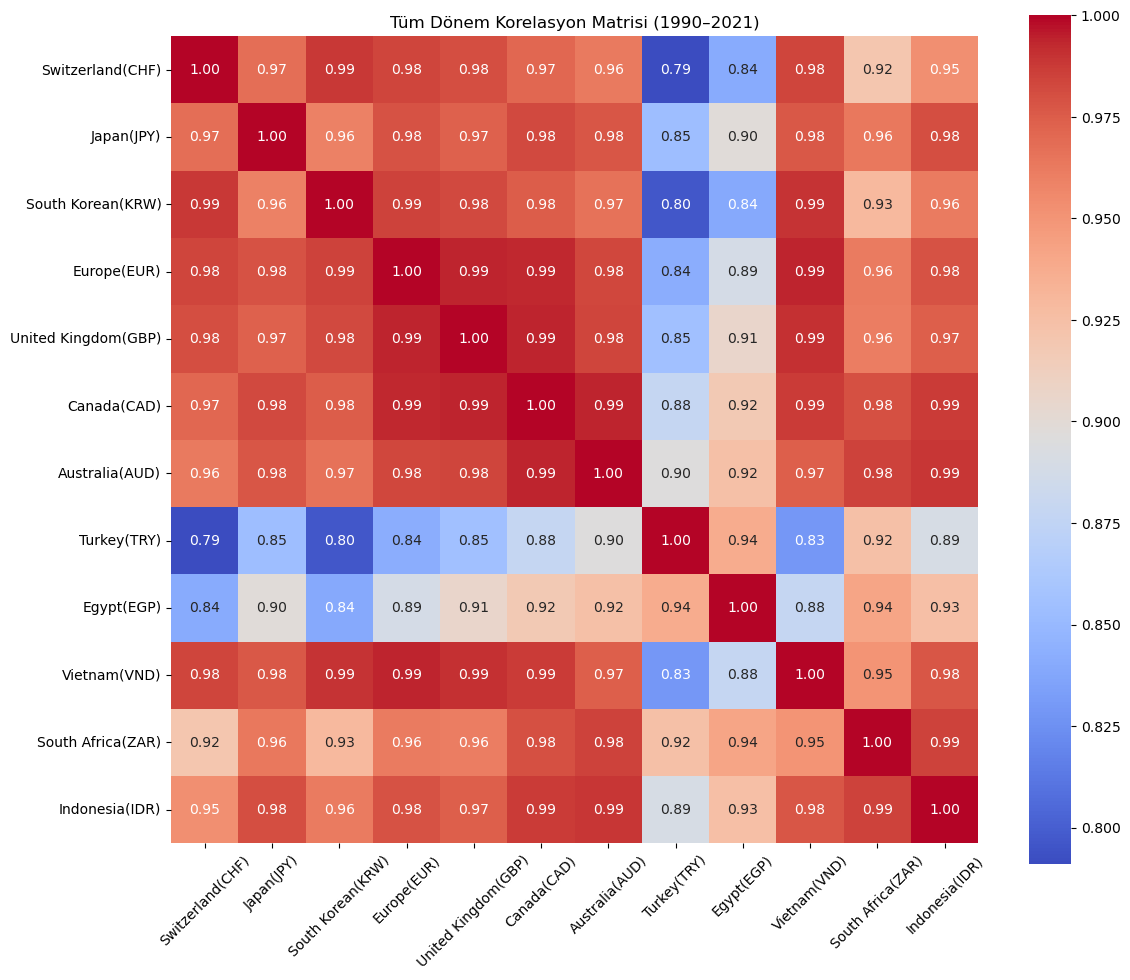

In [6]:
# Tüm dönem korelasyonu (1990–2021)
corr_all = df.corr()
corr_all_ordered = reorder_corr(corr_all, custom_order)

plot_corr_matrix(corr_all_ordered, "Tüm Dönem Korelasyon Matrisi (1990–2021)")


**Genel Bulgular**
- Gelişmiş ülkeler (İsviçre, Avrupa, Japonya, ABD, İngiltere) arasında güçlü korelasyonlar (r > 0.90) gözlenmiştir.  
- Bu ülkelerde altın fiyatları küresel ekonomik döngülere paralel hareket etmektedir.  
- Gelişmekte olan ülkelerde (Türkiye, Vietnam, Mısır) korelasyonlar daha zayıf ve dalgalıdır; yerel ekonomik koşullar ve para birimi oynaklığı belirleyici olmuştur.  
- Volatilitesi düşük ekonomiler daha istikrarlı ilişkiler sergilerken, yüksek oynaklığa sahip ülkeler bu düzeni bozabilmektedir.  

**Türkiye Özel Yorumu**
- Türkiye’nin gelişmiş ülkelerle korelasyonu genellikle orta düzeyde (0.60–0.70).  
- Vietnam, Mısır ve Endonezya gibi yüksek volatiliteye sahip ülkelerle korelasyonu görece daha yüksektir.  
- Bu durum, Türkiye’nin altın fiyatlarını daha çok iç ekonomik koşullar ve bölgesel krizlere göre şekillendirdiğini göstermektedir.

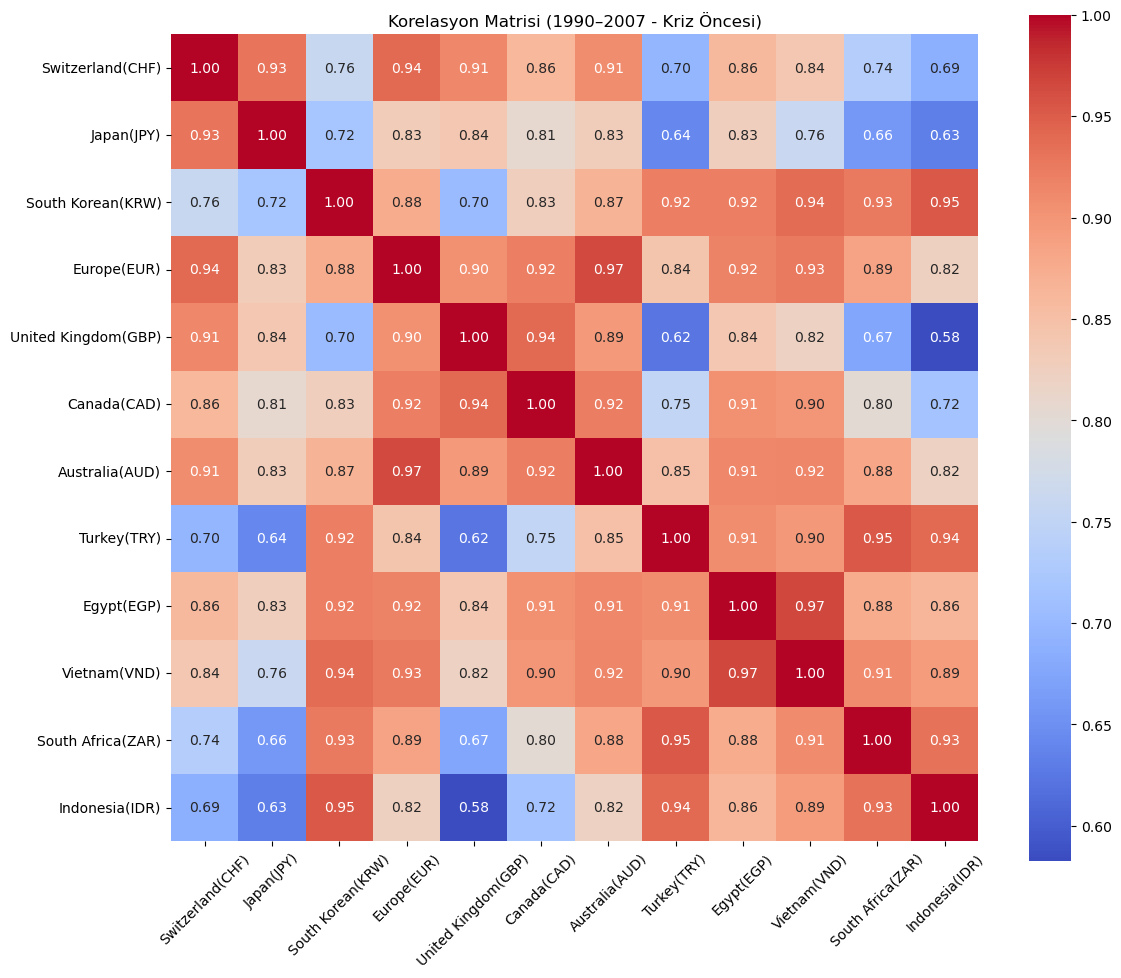

In [7]:
# 2007 kriz öncesi korelasyon
df_1990_2007 = df[df.index.year <= 2007]
corr_1990_2007 = reorder_corr(df_1990_2007.corr(), custom_order)
plot_corr_matrix(corr_1990_2007, "Korelasyon Matrisi (1990–2007 - Kriz Öncesi)")

**Genel Bulgular**
- Gelişmiş ülkeler (İsviçre, Japonya, Avrupa, ABD, İngiltere) arasında korelasyon oldukça yüksek (r > 0.90).  
- Bu ülkelerde altın piyasaları küresel ekonomik istikrara paralel hareket etmektedir.  
- Gelişmekte olan ülkelerde (Vietnam, Güney Afrika) senkronizasyon daha düşüktür.  

**Türkiye (2008 Krizi Öncesi)**
- Türkiye’nin gelişmiş ülkelerle korelasyonu 0.60–0.70 bandında.  
- Bu durum, Türkiye’nin küresel altın trendlerinden kısmen ayrıştığını ve daha çok kendi ekonomik dinamikleriyle hareket ettiğini göstermektedir.

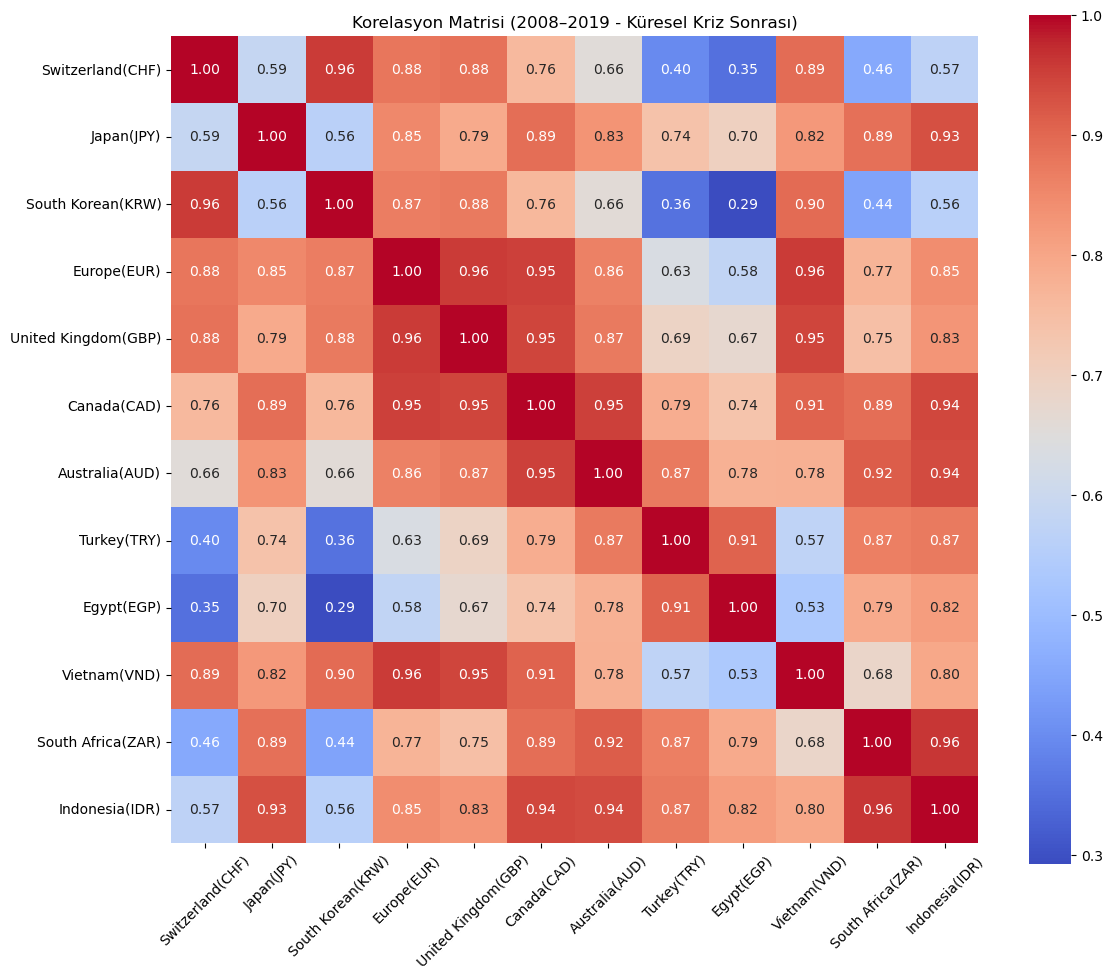

In [8]:
# 2008–2019 - Küresel Kriz Sonrası
df_2008_2019 = df[(df.index.year >= 2008) & (df.index.year <= 2019)]
corr_2008_2019 = reorder_corr(df_2008_2019.corr(), custom_order)
plot_corr_matrix(corr_2008_2019, "Korelasyon Matrisi (2008–2019 - Küresel Kriz Sonrası)")

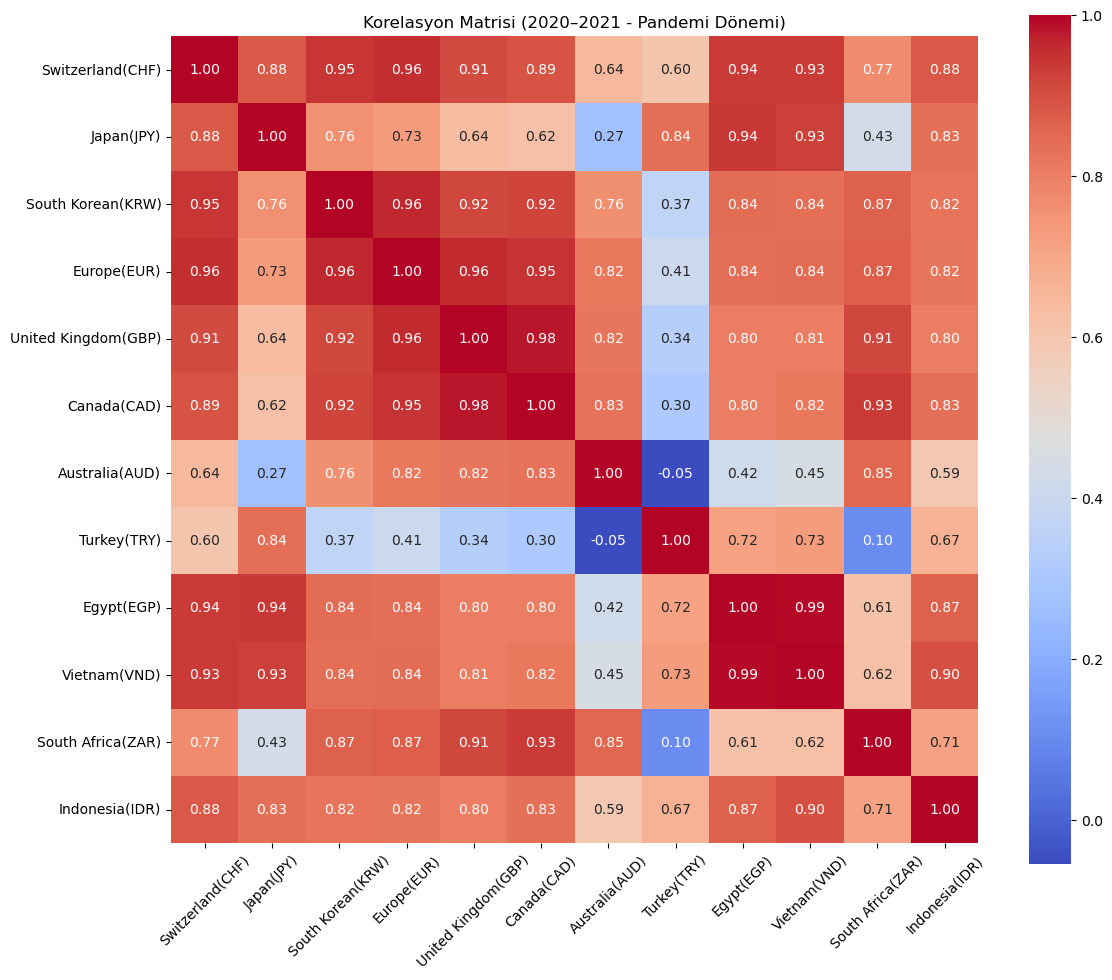

In [9]:
# 2020–2021 - Pandemi Dönem
df_2020_2021 = df[df.index.year >= 2020]
corr_2020_2021 = reorder_corr(df_2020_2021.corr(), custom_order)
plot_corr_matrix(corr_2020_2021, "Korelasyon Matrisi (2020–2021 - Pandemi Dönemi)")

**Dünya Genelinde**
- Kriz sonrası ülkeler arası korelasyon genişledi, senkronizasyon arttı.  
- Avrupa ülkeleri ve Asya ekonomileri arasında korelasyon yükseldi.  
- "Güvenli liman" etkisiyle altın fiyatları küresel ölçekte daha uyumlu hareket etti.  

**Türkiye**
- Türkiye’nin Japonya, Mısır ve Vietnam ile korelasyonu artmıştır (r > 0.75).  
- Bu durum, Türkiye’nin yüksek volatiliteye sahip ekonomilerle benzer fiyat dinamikleri sergilediğini gösterir.  
- Türkiye küresel dalgalanmalardan daha fazla etkilenmiştir.




# Kümeleme

# Altın Fiyatları Kümeleme Analizi (1990–2021)

Bu çalışmada, farklı ülkelerin 1990–2021 arasındaki altın fiyat hareketleri incelenmiştir.  
Amaç, ülkelerin fiyat serilerinden elde edilen istatistiksel göstergelerle benzer davranışlar sergileyen ülkeleri gruplandırmaktır.

## Yöntem
- Ortalama fiyat, volatilite, uzun vadeli eğilim ve kısa dönem dalgalanmalar hesaplandı.  
- Çok boyutlu veri seti oluşturuldu.  
- K-means kümeleme yöntemi ile ülkeler benzerliklerine göre segmentlere ayrıldı.

## Bulgular
- Altın fiyat dinamikleri bakımından birbirine yakın ülkeler gruplandırıldı.  
- Bu grupların ekonomik profilleri yorumlanarak küresel piyasalardaki yapısal benzerlikler ortaya kondu.

In [10]:
#  Gerekli Kütüphaneler
# Bu hücre en başta olmalı (herhangi bir import'tan önce)
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#  Veriyi Oku ve Hazırla
df = pd.read_excel("Altın.xlsx", parse_dates=["Date"])

# Date kolonunu index yap
df.set_index("Date", inplace=True)

# Kolonları kontrol et
df.columns

Index(['United States(USD)', 'Europe(EUR)', 'Japan(JPY)',
       'United Kingdom(GBP)', 'Canada(CAD)', 'Switzerland(CHF)', 'India(INR)',
       'China(CNY)', 'Turkey(TRY)', 'Saudi Arabia(SAR)', 'Indonesia(IDR)',
       'United Arab Emirates(AED)', 'Thailand(THB)', 'Vietnam(VND)',
       'Egypt(EGP)', 'South Korean(KRW)', 'Australia(AUD)',
       'South Africa(ZAR)'],
      dtype='object')

In [12]:
# Sadece sayısal kolonları seç
data = df.select_dtypes(include=[np.number])
data.head()

,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
Date,,,,,,,,,,,,,,,,,,
1990-01-31,415.1,321.3,59972.3,247.1,492.0,623.8,7041.0,1930.2,1.0,1557.4,745400.5,1524.9,10623.3,1867170.0,1059.9,283240.8,540.0,1063.2
1990-02-28,407.7,316.2,60672.5,241.2,485.7,607.9,6957.4,1936.8,1.0,1527.7,747408.3,1496.0,10494.1,1853648.1,1085.6,282356.4,534.1,1040.4
1990-03-30,368.5,283.9,57987.1,223.7,431.0,550.8,6334.4,1717.1,0.9,1376.8,652783.7,1348.1,9506.1,1622520.2,947.3,257424.6,488.4,976.9
1990-04-30,367.8,280.7,58375.7,224.3,428.3,533.9,6379.3,1739.6,0.9,1370.0,669724.5,1341.5,9510.6,1651644.8,982.5,258294.2,488.9,975.8
1990-05-31,363.1,280.2,55420.9,216.5,426.2,520.1,6295.5,1717.4,0.9,1371.7,671905.9,1343.2,9352.3,1646877.6,988.3,261068.1,472.2,967.3


In [13]:
#  Ülke Bazlı Öznitelik Çıkarımı
features = {}
for country in data.columns:
    series = data[country].dropna()
    if len(series) < 24:
        continue
    features[country] = {
        'mean': series.mean(),
        'std': series.std(),
        'range': series.max() - series.min(),
        'trend': series.iloc[-1] - series.iloc[0],
        'last12_change': (series.iloc[-1] - series.iloc[-12]) / series.iloc[-12] * 100 if len(series) >= 12 else 0
    }

feature_df = pd.DataFrame(features).T
feature_df.head()

,mean,std,range,trend,last12_change
United States(USD),793.546702,511.651495,1710.1,1410.7,-6.723204
Europe(EUR),648.602902,415.313653,1437.2,1218.4,-5.926560
Japan(JPY),83466.892084,49272.602236,179907.5,140403.8,-3.464468
United Kingdom(GBP),523.384960,375.305762,1339.3,1066.1,-10.171694
Canada(CAD),960.238259,589.456131,2251.8,1787.2,-10.630122


para birim farkı olduğu için normalize edip yeniden bakalım

In [14]:
#  Veriyi Ölçekle
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_df)

scaled_df = pd.DataFrame(scaled_features, 
                         index=feature_df.index, 
                         columns=feature_df.columns)

scaled_df.head()

,mean,std,range,trend,last12_change
United States(USD),-0.353489,-0.354486,-0.357608,-0.357133,0.065486
Europe(EUR),-0.353527,-0.354515,-0.357632,-0.357151,0.224936
Japan(JPY),-0.331942,-0.339689,-0.342224,-0.343976,0.717732
United Kingdom(GBP),-0.353560,-0.354527,-0.357640,-0.357166,-0.624740
Canada(CAD),-0.353446,-0.354462,-0.357561,-0.357097,-0.716496


- **ABD, Avrupa, İngiltere, Kanada**: Ortalama ve trend değerleri çok benzer; uzun vadede senkronize.  
  - Son 12 ayda ABD (+0.06) ve Avrupa (+0.22) pozitif, İngiltere (-0.62) ve Kanada (-0.71) negatif ayrışmış.  

- **Japonya**: Diğerlerinden farklı, son 12 ayda güçlü pozitif değişim (+0.72).  

**Özet**
Uzun vadede gelişmiş ülkeler benzer hareket ediyor, ancak son dönemde **Japonya pozitif ayrışırken İngiltere ve Kanada negatif ayrışmış**.

In [15]:
# K Değeri Optimizasyonu
wss, silhouette_scores = [], []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_df)
    wss.append(km.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, labels))

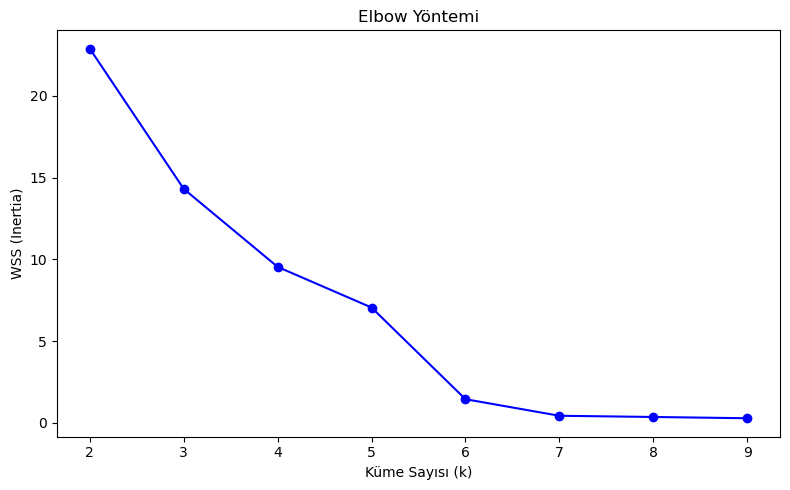

In [16]:
# Elbow yöntemi
plt.figure(figsize=(8, 5))
plt.plot(K, wss, 'bo-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('WSS (Inertia)')
plt.title('Elbow Yöntemi')
plt.tight_layout()
plt.show()

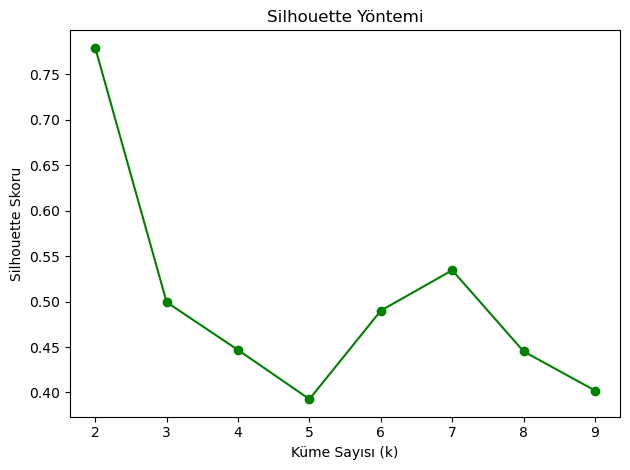

In [17]:
# Silhouette yöntemi
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')
plt.title('Silhouette Yöntemi')
plt.tight_layout()
plt.show()

 K-değerimizi kırılma noktaları olan 5'i seçtik 

# Kümeleme

In [18]:
# Kümeleme Algoritmaları
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Agglomerative
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(scaled_df)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Gaussian Mixture
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

In [19]:
# Sonuçları DataFrame olarak birleştirelim
kmeans_clusters = pd.DataFrame({'Ülke': scaled_df.index, 'Küme (KMeans)': kmeans_labels})
agglo_clusters = pd.DataFrame({'Ülke': scaled_df.index, 'Küme (Agglomerative)': agglo_labels})
gmm_clusters = pd.DataFrame({'Ülke': scaled_df.index, 'Küme (GMM)': gmm_labels})
dbscan_clusters = pd.DataFrame({'Ülke': scaled_df.index, 'Küme (DBSCAN)': dbscan_labels})

cluster_table = pd.concat([
    kmeans_clusters.set_index('Ülke'),
    agglo_clusters.set_index('Ülke'),
    gmm_clusters.set_index('Ülke'),
    dbscan_clusters.set_index('Ülke')
], axis=1)

print("\nTüm algoritmalara göre ülke kümeleri:")
cluster_table.sort_index()


Tüm algoritmalara göre ülke kümeleri:


,Küme (KMeans),Küme (Agglomerative),Küme (GMM),Küme (DBSCAN)
Ülke,,,,
Australia(AUD),0,0,0,0
Canada(CAD),2,2,0,0
China(CNY),2,2,0,0
Egypt(EGP),0,0,0,0
Europe(EUR),0,0,0,0
India(INR),0,0,0,0
Indonesia(IDR),3,1,3,-1
Japan(JPY),0,0,0,0
Saudi Arabia(SAR),0,0,0,0


In [20]:
# Performans Karşılaştırması
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

results = {}

# KMeans
results['KMeans'] = {
    'Silhouette': silhouette_score(scaled_df, kmeans_labels),
    'DB Index': davies_bouldin_score(scaled_df, kmeans_labels),
    'CH Score': calinski_harabasz_score(scaled_df, kmeans_labels)
}

# Agglomerative
results['Agglomerative'] = {
    'Silhouette': silhouette_score(scaled_df, agglo_labels),
    'DB Index': davies_bouldin_score(scaled_df, agglo_labels),
    'CH Score': calinski_harabasz_score(scaled_df, agglo_labels)
}

# GMM
results['GMM'] = {
    'Silhouette': silhouette_score(scaled_df, gmm_labels),
    'DB Index': davies_bouldin_score(scaled_df, gmm_labels),
    'CH Score': calinski_harabasz_score(scaled_df, gmm_labels)
}

In [21]:
# Sonuçları Görüntüleme
score_df = pd.DataFrame(results).T
score_df.columns = ['Silhouette Skoru', 'Davies-Bouldin İndeksi', 'Calinski-Harabasz Skoru']

# Silhouette skoruna göre sıralama
score_df = score_df.sort_values(by='Silhouette Skoru', ascending=False).round(3)

print("Kümeleme Yöntemlerinin Performans Karşılaştırması:")
score_df

Kümeleme Yöntemlerinin Performans Karşılaştırması:


,Silhouette Skoru,Davies-Bouldin İndeksi,Calinski-Harabasz Skoru
Agglomerative,0.499,0.601,39.671
KMeans,0.393,0.331,38.241
GMM,0.348,0.534,28.134


# Ülkelerin Kümeleme Sonuçları

- #### KMeans & Agglomerative
- **Gelişmiş ülkeler** (ABD, Avrupa, Japonya, İsviçre vb.) tüm yöntemlerde birlikte hareket ediyor → küresel senkronizasyon.  
- **Gelişmekte olan ülkeler** (Türkiye, Vietnam, Endonezya, Güney Afrika) yöntemlere göre farklı kümelere düşüyor → daha oynak ve aykırı dinamikler.  
- **DBSCAN** özellikle Türkiye, Vietnam ve Endonezya’yı aykırı değer olarak işaretlemiş → bu ülkeler küresel altın fiyat hareketlerinden ayrışıyor.  

# TÜRKİYE ALTIN FİYATLARININ ZAMAN SERİSİ ANALİZİ

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [23]:
# Veriyi oku
df = pd.read_excel("Altın.xlsx", parse_dates=["Date"]).set_index("Date")

# Sadece Türkiye kolonunu al ve aylık ortalama
df = df[["Turkey(TRY)"]].resample("ME").mean()

# Eksik değerleri 3 aylık hareketli ortalama ile doldur
df = df.fillna(df.rolling(3, min_periods=1).mean())

# Artık df sadece Türkiye'nin aylık verisi (eksikler doldurulmuş)
print(df.head(12))

            Turkey(TRY)
Date                   
1990-01-31          1.0
1990-02-28          1.0
1990-03-31          0.9
1990-04-30          0.9
1990-05-31          0.9
1990-06-30          0.9
1990-07-31          1.0
1990-08-31          1.1
1990-09-30          1.1
1990-10-31          1.1
1990-11-30          1.1
1990-12-31          1.1


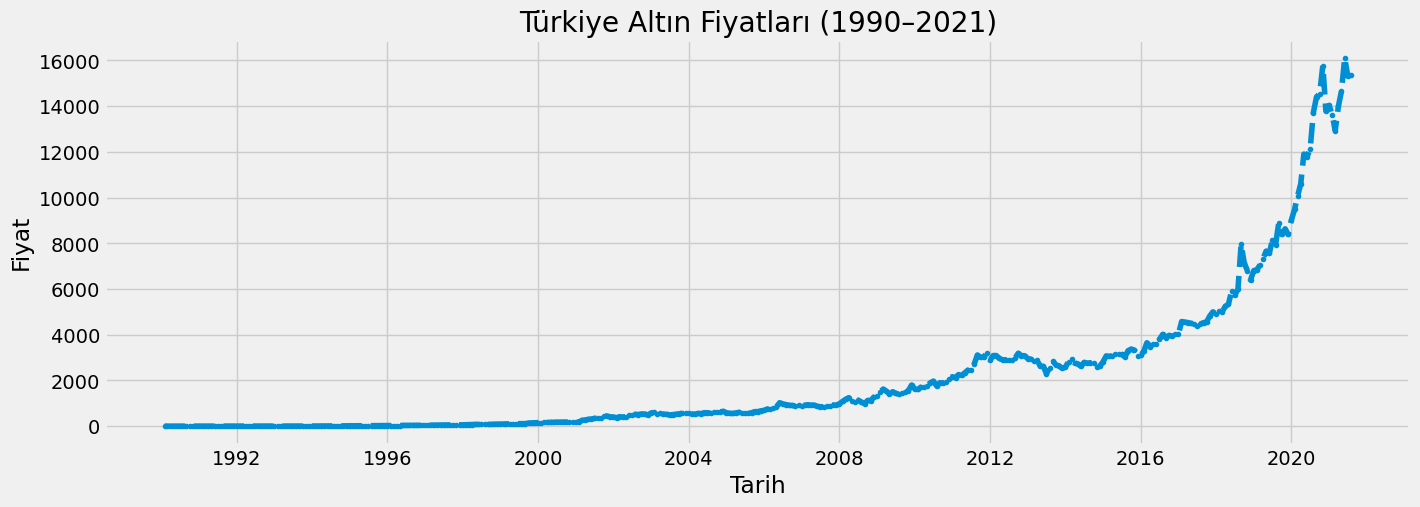

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df["Turkey(TRY)"], marker='.', linestyle='--')
plt.title("Türkiye Altın Fiyatları (1990–2021)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid(True)
plt.show()

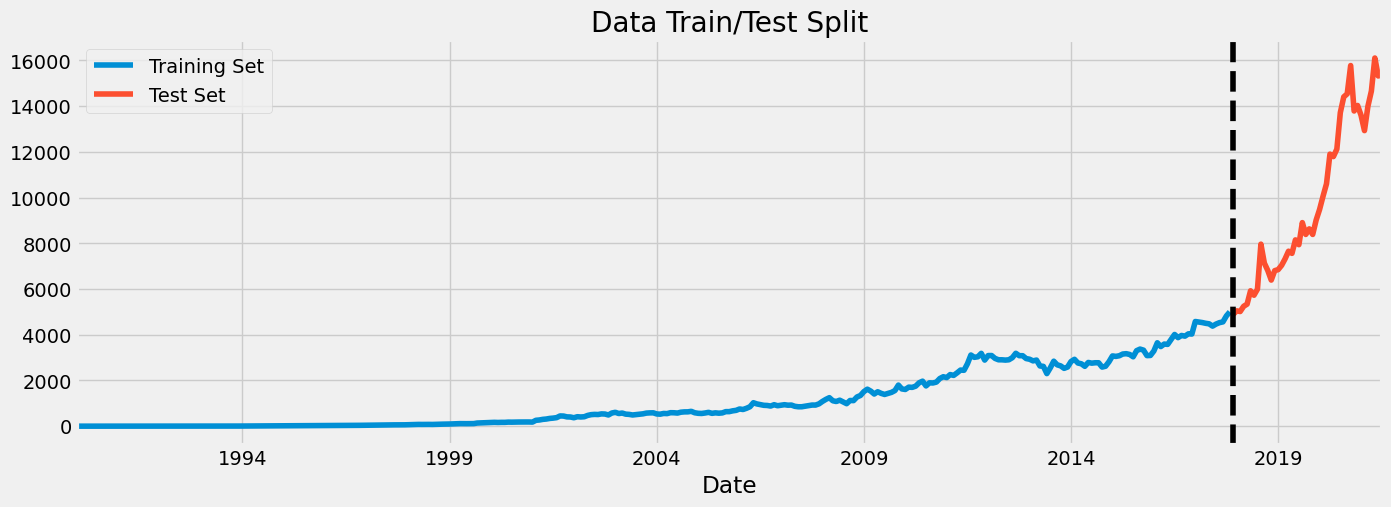

In [25]:
train = df.loc[df.index < '29-12-2017']

test = df.loc[df.index >= '29-12-2017']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('29-12-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


In [26]:
def create_features(df, target_col="Turkey(TRY)", lags=[1,3,6], roll_windows=[3,6]):
    """
    Zaman serisine lag ve rolling özellikleri ekler.
    
    Parameters:
    -----------
    df : DataFrame (Date indexli)
    target_col : str, hedef kolon adı
    lags : list, kaç dönem gecikme eklenecek
    roll_windows : list, hangi pencere uzunlukları için rolling mean/std eklenecek
    
    Returns:
    --------
    df : DataFrame, yeni feature'larla birlikte
    """
    df = df.copy()
    
    # Lag features
    for lag in lags:
        df[f"lag_{lag}"] = df[target_col].shift(lag)
    
    # Rolling features
    for w in roll_windows:
        df[f"roll_mean_{w}"] = df[target_col].shift(1).rolling(w).mean()
        df[f"roll_std_{w}"] = df[target_col].shift(1).rolling(w).std()
    
    # Takvimsel özellikler
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["quarter"] = df.index.quarter
    
    return df

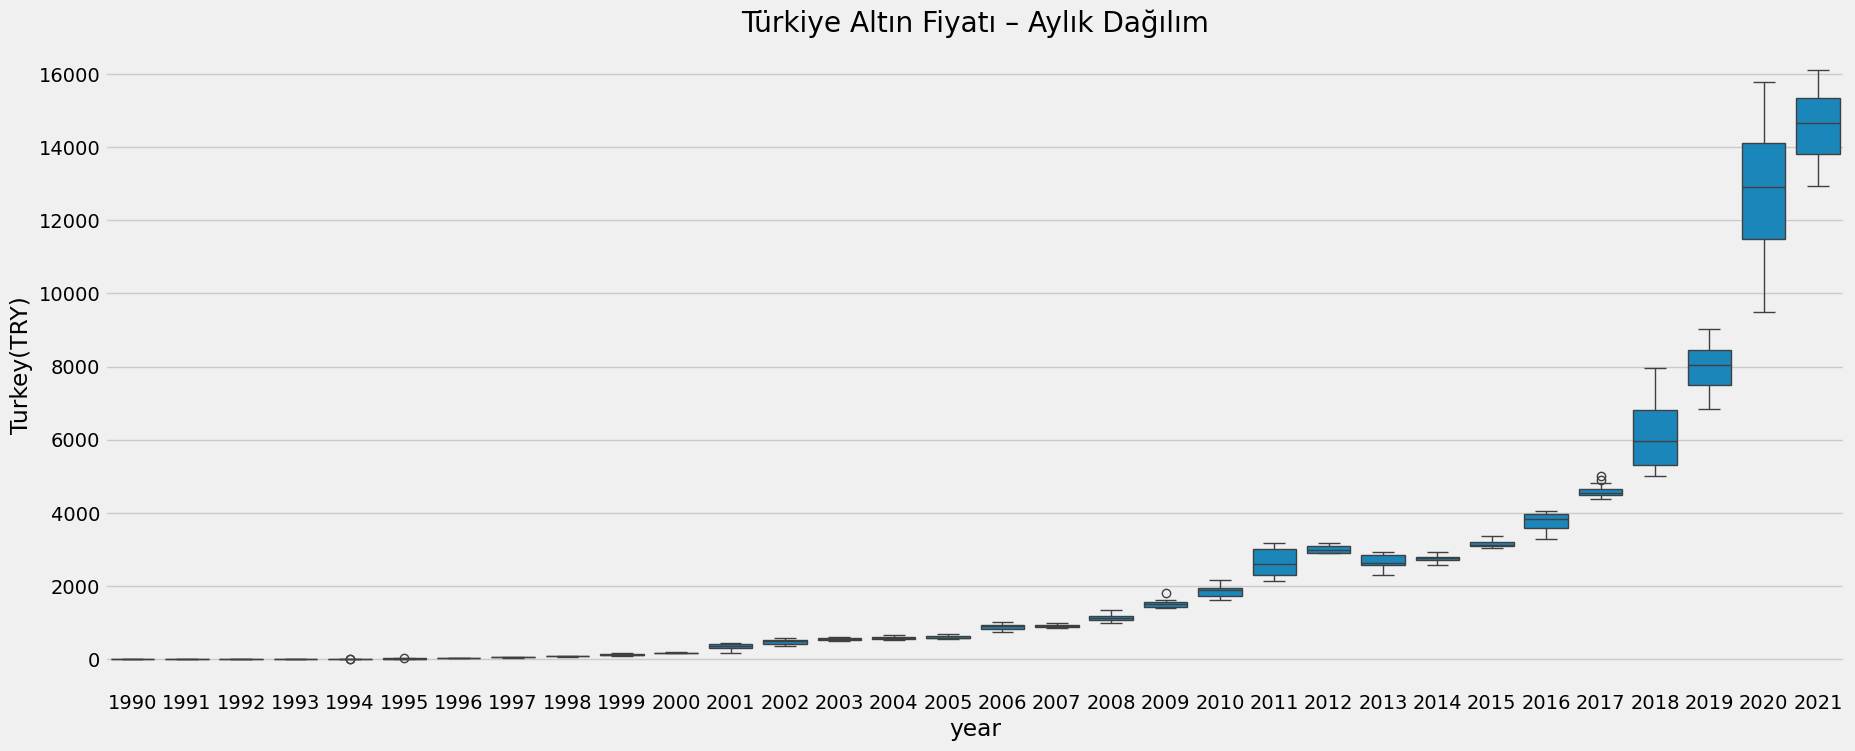

In [27]:
df["year"] = df.index.year

fig, ax = plt.subplots(figsize=(20, 8))

sns.boxplot(
    data=df,
    x="year",           # ay kolonunu kullan
    y="Turkey(TRY)",     # fiyat kolonunu kullan
    ax=ax
)

ax.set_title("Türkiye Altın Fiyatı – Yıllık Dağılım")
plt.show()

In [28]:
df = pd.read_excel("Altın.xlsx", parse_dates=["Date"]).set_index("Date")
df = df[["Turkey(TRY)"]].resample("ME").mean().dropna()

df = create_features(df, target_col="Turkey(TRY)")

# Train/Test ayır
train = df.iloc[:-36]   # son 3 yıl test
test  = df.iloc[-36:]

FEATURES = [col for col in df.columns if col != "Turkey(TRY)"]
TARGET = "Turkey(TRY)"
df = create_features(df, target_col="Turkey(TRY)")
df = df.dropna()

train = df.iloc[:-24]
test  = df.iloc[-24:]
X_train, y_train = train[FEATURES], train[TARGET]
X_test, y_test   = test[FEATURES], test[TARGET]

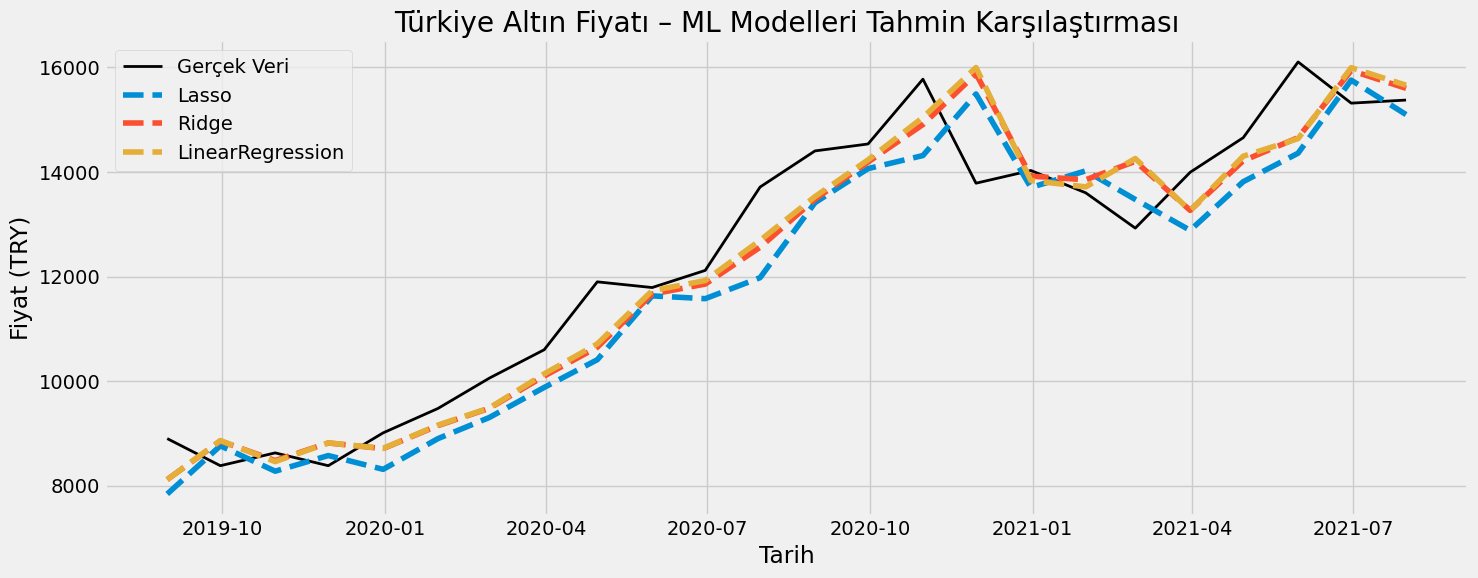

In [35]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

# 1. Modelleri tanımla
models = {
    "Lasso": Lasso(alpha=100000),
    "Ridge": Ridge(alpha=100000),
    "LinearRegression": LinearRegression(),
}

# 2. Eğitim ve tahmin
preds = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds[name] = model.predict(X_test)

# 3. Tahminleri test setine ekle
test = test.copy()
for name, yhat in preds.items():
    test[name] = yhat

# 4. Grafik
plt.figure(figsize=(15, 6))
plt.plot(test.index, y_test, label="Gerçek Veri", linewidth=2, color="black")

for name in models.keys():
    plt.plot(test.index, test[name], label=name, linestyle="--")

plt.legend()
plt.title("Türkiye Altın Fiyatı – ML Modelleri Tahmin Karşılaştırması")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (TRY)")
plt.tight_layout()
plt.show()

Linear Regresyon daha iyi uyum sağlamış gibi görünse de değerlendirme metriklerine bakalım

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# 1. Metrikleri hesapla
results = []
for name, yhat in preds.items():
    rmse = np.sqrt(mean_squared_error(y_test, yhat))
    mae = mean_absolute_error(y_test, yhat)
    results.append({"Model": name, "RMSE": rmse, "MAE": mae})

# 2. Sonuçları tabloya dök
results_df = pd.DataFrame(results).set_index("Model")
print(results_df)


                        RMSE         MAE
Model                                   
Lasso             934.135454  790.923807
Ridge             812.928424  652.478150
LinearRegression  809.603000  635.290398


Linear Regresyon ile 4 yıllık tahmin yapalım

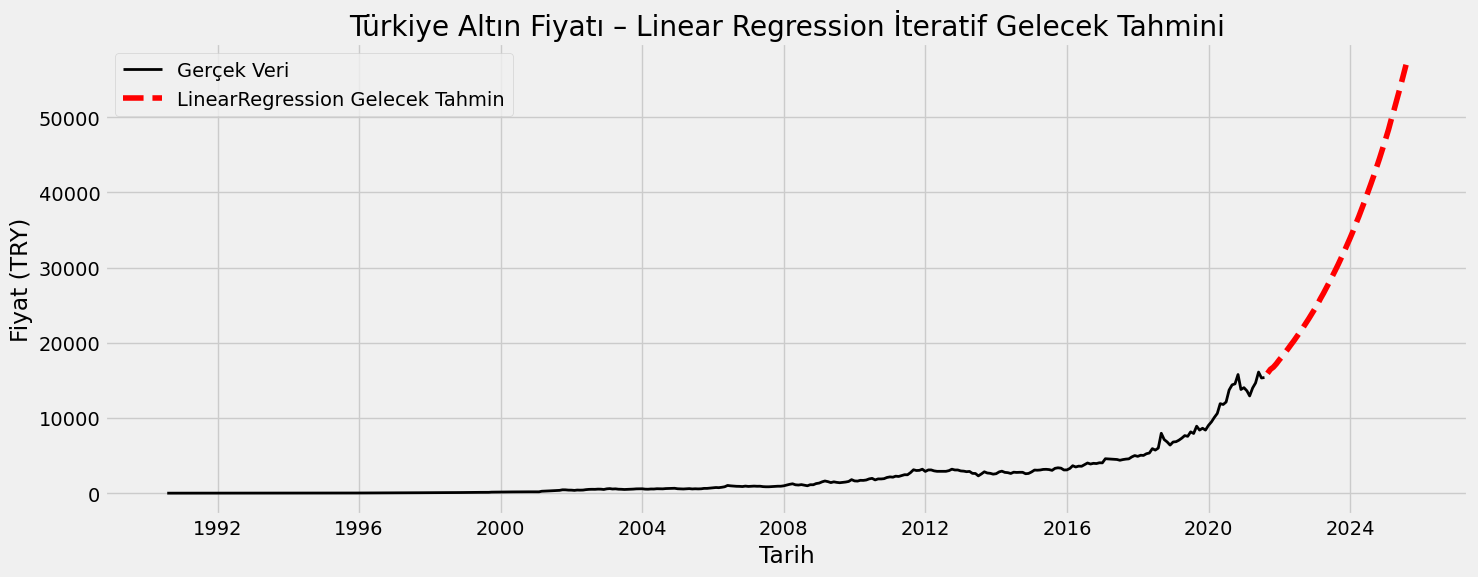

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Modeli tüm veriyle eğit
reg = LinearRegression()
reg.fit(X_train, y_train)

# 2. Gelecek tarihleri oluştur
future_dates = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(),
                             periods=48, freq="ME")

# 3. İteratif tahmin için kopya DataFrame
last_df = df.copy()
future_preds = []

for date in future_dates:
    features = {
        "year": date.year,
        "month": date.month,
        "quarter": date.quarter,
        "lag_1": last_df["Turkey(TRY)"].iloc[-1],
        "lag_3": last_df["Turkey(TRY)"].iloc[-3:].mean(),
        "lag_6": last_df["Turkey(TRY)"].iloc[-6:].mean(),
        "roll_mean_3": last_df["Turkey(TRY)"].iloc[-3:].mean(),
        "roll_std_3": last_df["Turkey(TRY)"].iloc[-3:].std(),
        "roll_mean_6": last_df["Turkey(TRY)"].iloc[-6:].mean(),
        "roll_std_6": last_df["Turkey(TRY)"].iloc[-6:].std(),
    }
    X_future = pd.DataFrame([features])[X_train.columns]
    yhat = reg.predict(X_future)[0]
    future_preds.append(yhat)

    # Tahmini veri setine ekle
    last_df.loc[date, "Turkey(TRY)"] = yhat

# 4. Sonuçları DataFrame’e koy
future_df = pd.DataFrame({"prediction": future_preds}, index=future_dates)

# 5. Grafik
plt.figure(figsize=(15, 6))
plt.plot(df.index, df["Turkey(TRY)"], label="Gerçek Veri", linewidth=2, color="black")
plt.plot(future_df.index, future_df["prediction"], label="LinearRegression Gelecek Tahmin", linestyle="--", color="red")

plt.legend()
plt.title("Türkiye Altın Fiyatı – Linear Regression İteratif Gelecek Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (TRY)")
plt.tight_layout()
plt.show()

# Türkiye Altın Fiyatı – Linear Regression Tahmini

## Gözlemler
- **Gerçek veri** (siyah çizgi): 1990’dan 2021’e kadar altın fiyatlarının tarihsel seyri.  
- **Tahmin** (kırmızı kesikli çizgi): 2021 sonrası fiyatlar doğrusal regresyonla projeksiyon yapılmış.  
- 2018 sonrası fiyatlar hızla yükselmiş; model bu ivmeyi doğrusal olarak ileriye taşımış.  

## Yorum
- Linear Regression, trendi düz bir çizgiyle genelleştirir.  
- Bu nedenle **2025’e kadar sürekli artan bir fiyat tahmini** sunar.  
- Ancak altın fiyatları genellikle **dönemsel dalgalanmalara** ve **ekonomik şoklara** duyarlıdır.  
- Bu model uzun vadeli eğilimi göstermek için faydalı olsa da, kısa vadeli oynaklıkları yakalamada sınırlıdır.

## Sonuç
Model, Türkiye’deki altın fiyatlarının yükselen trendini doğrusal olarak uzatıyor. Ancak daha gerçekçi tahminler için **zaman serisi modelleri (ARIMA, LSTM)** gibi yöntemler daha uygun olabilir.